# Ionosphere Radar Reflection Classification Using Tensorflow/Keras

## Dataset Description:
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

## Attribute Information:
All 34 are continuous
The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

#### Below are the steps which we will be basically following:
1. Cleaning the Data
2. Undersampling the Data
3. Splitting the Data
4. Building a Multilayer Neural Network with Keras
5. Compiling
6. Training
7. Prediction 
8. Score

# Setting-up Envoirnment 

Firstly, we will import all the required libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['figure.figsize']=(12,5)
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a> <br>
## Loading Data

In [2]:
df_ion = pd.read_csv("../input/ionosphere-data/ionosphere_data.csv")

In [3]:
df_ion.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


#### Checking Shape and Size

In [4]:
print(df_ion.shape)
print(df_ion.size)

(351, 35)
12285


<a id="2"></a> <br>
# Cleaning the Data

In [5]:
df_ion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

There is no missing value.

#### Dropping Feature2 Column

In [6]:
print(df_ion.feature2.nunique())

1


In [7]:
df_ion.drop('feature2', axis=1, inplace = True)

In [8]:
df_ion.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


#### Label column

<AxesSubplot:xlabel='label', ylabel='count'>

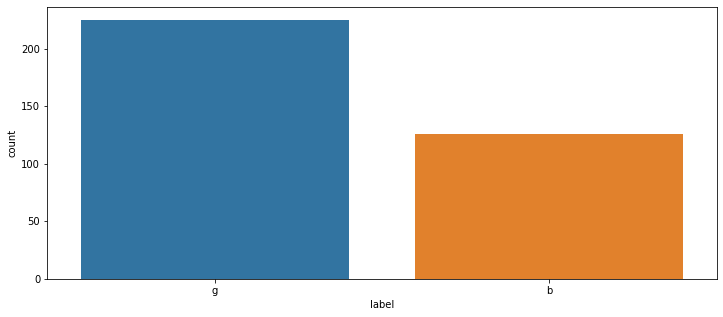

In [9]:
sns.countplot(x="label", data=df_ion)

# Shuffling the Data

In [10]:
df_ion = df_ion.sample(frac = 1)

## Encoding label column

In [11]:
df_ion = df_ion.replace({'label' :{'g': 1, # g => good = 1
                                 'b': 0}}) # b => bad = 0

# Splitting the Data
Splitting data into training and testing data.

In [12]:
Y = df_ion.pop('label')
X = df_ion

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

210
210
141
141


# Standardizing the Data

In [15]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.transform(X_test)


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras import layers
from keras import regularizers
from sklearn import metrics

# Building a Multi-layer Neural Network

In [17]:
model = Sequential()
model.add(Dense(32 , activation='relu', input_shape=(X_train.shape[-1],))) # Input Layer
model.add(Dropout(0.2))                       # Dropout Layer
model.add(Dense(10 , activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))                       # Dropout Layer
model.add(Dense(8 , activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))                       # Dropout Layer
#model.add(Dense(4 , activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

As this is a binary classification problem we will use **sigmoid activation** in the last layer.

# Compiling Model

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #optimizer

model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) 

As this is a binary classification problem we will use **Binary Cross Entropy** for loss and **Accuracy** for metric.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9

<a id="8"></a> <br>
## Training

In [20]:
num_epochs = 10
history = model.fit(X_train,y_train,epochs=num_epochs, batch_size=5, validation_split=0.2, verbose=0)
history_dict = history.history

##### Training Loss Vs Validation Loss

Text(0.5, 0, 'Epochs')

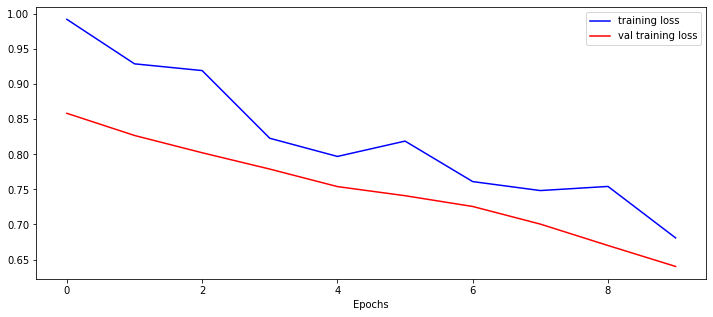

In [21]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

##### Validation accuracy

Text(0.5, 0, 'Epochs')

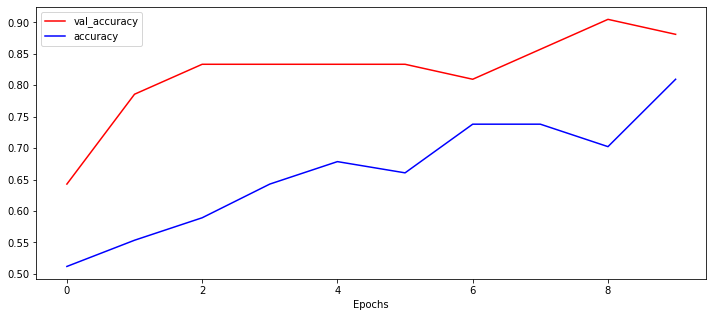

In [22]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

<a id="11"></a> <br>
## Prediction

In [23]:
y_pred = model.predict_classes(X_test)

## Score

In [24]:
#scores
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred))
#print(metrics.classification_report(y_test, y_pred))

Accuracy Neural Net: 0.7021276595744681
Precision Neural Net: 0.6865671641791045
Recall Neural Net: 1.0
F1 Score Neural Net: 0.8141592920353982


## ACCURACY = 70 %
Accuracy can be improved by tuning hyperparmeters.

### If this Kernel helped you in any way, some <span style="color:red">UPVOTES !!!</span> would be very much appreciated.